In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io

In [22]:
data=scipy.io.loadmat('ex7data2.mat')
X=data['X']

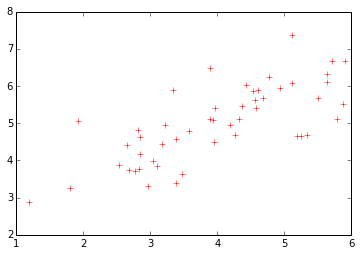

In [6]:
#visualizing the data
plt.plot(X[:,0],X[:,1],'r+')

In [32]:
def findClosestCentroid(data,centroids):
    idx=np.zeros(data.shape[0])
    num_centroids=len(centroids)
    for elem,index in zip(data,range(X.shape[0])):
        all_distance=[]
        for cluster_num,cluster_centroid in zip(range(1,num_centroids+1),centroids):
            distance=np.sqrt(np.sum(np.square(elem-cluster_centroid)))
            all_distance.append((distance,cluster_num))
        _,cluster_assignment=min(all_distance,key=lambda x:x[0])
        idx[index]=cluster_assignment
    return idx
                          
initial_centroids=np.array([[3,3],[6,2],[8,5]]) # each list of the list of list is a row vector

#the first three centroids closest centroids should be 1,3,2

print findClosestCentroid(X[:3,:],initial_centroids)

idx=findClosestCentroid(X,initial_centroids)



[ 1.  3.  2.]


In [53]:
def computeMeanCentroids(X,idx,K):
    new_centroids=[]
    for i in range(1,K+1):
        mean=np.mean(X[idx==i],axis=0)
        new_centroids.append(mean)
    return np.asarray(new_centroids)


computeMeanCentroids(X,idx,3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [83]:
def kmeans(X,K):
    #initializing the K starting random points
    idx_array=np.arange(X.shape[0])
    np.random.shuffle(idx_array)
    initial_centroids=X[idx_array[:K]]
    for i in range(50):
        idx=findClosestCentroid(X,initial_centroids)
        new_centroids=computeMeanCentroids(X,idx,K)
    return (X,idx,new_centroids)

kmeans_out=kmeans(X,3)

##PCA

In [88]:
#here i am working with pca on a 2D dataset.

data=scipy.io.loadmat('ex7data1.mat')
X=data['X']

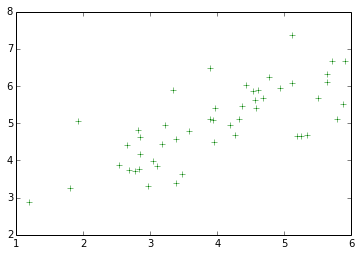

In [89]:
plt.plot(X[:,0],X[:,1],"g+")

#variance along x axis is larger and variance along y axis is smaller. so one of the principal component will dominate
#the other

PCA consists of 2 steps. The first step is to compute the convariance matrix of the data. Then the octave's SVD function is used to get the principal component laoding for the PCA.Before using PCA, it is important to rst normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

After normalizing the data, you can run PCA to compute the principal components. You task is to complete the code in pca.m to compute the principal components of the dataset. First, you should compute the covariance matrix of the data, which is given by:


covariance matrix= (1/m)*(X'X)

where X is the data matrix with examples in rows, and m is the number of examples. Note that covariance matrix is a n x n matrix.



In [162]:
#normalizing X before running PCA, this is needed because scaling affects the variance in each direction hence to make
#data dimension invariant i am scaling the PCA.
X_norm=(X-np.mean(X,axis=0))/np.std(X,axis=0)


def pca(X,num_components):    
    m,n=X.shape
    covariance_matrix=(1./m)*(np.dot(X.T,X))
    return np.linalg.svd(covariance_matrix)

U,S,V=pca(X_norm,2)


#where U will contain the principal components and S will contain a diagonal matrix. The matrix S is the loading for 
#each of the principal components


'''The script will also output the top principal component (eigen-
vector) found, and you should expect to see an output of about [-0.707
-0.707]. (It is possible that Octave may instead output the negative of this,
since U1 and 􀀀U1 are equally valid choices for the rst principal component.)
You should now submit your PCA function.'''

'The script will also output the top principal component (eigen-\nvector) found, and you should expect to see an output of about [-0.707\n-0.707]. (It is possible that Octave may instead output the negative of this,\nsince U1 and \xf4\x80\x80\x80U1 are equally valid choices for the \nrst principal component.)\nYou should now submit your PCA function.'

In [149]:
print U
print S
print V

print 'first principle component',U[0,:]
print 'second principle component',U[1,:]

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 1.73553038  0.26446962]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
first principle component [-0.70710678 -0.70710678]
second principle component [-0.70710678  0.70710678]


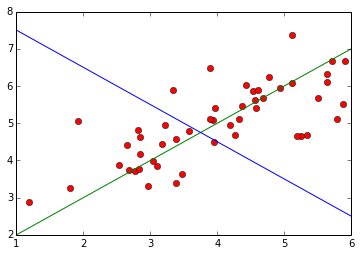

In [150]:
#plotting the principle components

slope_1=(-0.70/-0.70)
slope_2=(0.70/-0.70)

plt.plot(X[:,0],X[:,1],"ro")
plt.plot(range(1,7),map(lambda x:((x*slope_1+1)),range(1,7)),'g-')
plt.plot(range(1,7),map(lambda x:((x*slope_2+8.5)),range(1,7)),'b-')

In [134]:
#dot product of the two eigen vector is 0 this means the two vectors are perpendicular to each other
np.dot(U[0,:],U[1,:])

-1.6653345369377348e-16

In [163]:
def reduce_to_k_dim(data,pca_matrix,num_components):
    return np.dot(X,np.transpose(U[:num_components,:]))

#reduction of the input data to a single dimension, ie along the first principal component
reduce_to_k_dim(X_norm,U,1)

array([[-4.78759045],
       [-7.34122042],
       [-4.99760204],
       [-4.58251038],
       [-4.96535088],
       [-7.33909864],
       [-5.02657745],
       [-8.90393595],
       [-6.38329374],
       [-7.20197778],
       [-7.05107253],
       [-6.95290959],
       [-6.4674726 ],
       [-7.00429773],
       [-4.66963233],
       [-8.4480763 ],
       [-7.3196659 ],
       [-5.28701594],
       [-8.81999314],
       [-6.95020407],
       [-8.75989905],
       [-5.92729807],
       [-8.315444  ],
       [-6.33065452],
       [-4.54033809],
       [-5.77450612],
       [-7.69650922],
       [-7.70841907],
       [-5.39933015],
       [-6.35631705],
       [-6.53101334],
       [-8.06183103],
       [-4.92218554],
       [-7.0797285 ],
       [-5.61499734],
       [-7.8001156 ],
       [-4.53023245],
       [-7.90528254],
       [-3.56709632],
       [-6.67057627],
       [-7.38689297],
       [-5.3854378 ],
       [-4.95846894],
       [-7.41694217],
       [-4.429343  ],
       [-6

In [168]:

print X_norm

[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]
 [-0.08490201  1.46633377]
 [-0.44215763 -1.35221333]
 [ 1.65512709  1.65622961]
 [-0.05198776  0.09440201]
 [ 0.49305926  0.61245677]
 [ 0.50359639  0.38973079]
 [ 0.32935623  0.45242294]
 [ 0.17431804 -0.04748911]
 [ 1.08056741 -0.33689741]
 [-0.99325294 -1.21879564]
 [ 1.41742949  1.2923503 ]
 [ 0.60026548  0.65385535]
 [-0.98061738 -0.37147508]
 [ 0.96523763  2.32981886]
 [ 1.02758927 -0.35168199]
 [ 1.47948139  1.65649752]
 [-0.35270365 -0.19743438]
 [ 1.42096706  1.10315449]
 [ 0.23612558 -0.30931801]
 [-1.25101023 -1.1038306 ]
 [-0.65914279 -0.05946964]
 [ 0.80965726  0.93988073]
 [ 1.55321995  0.10421963]
 [-1.00960756 -0.18146695]
 [-0.08649323  0.09629619]
 [-0.55631899  0.87867759]
 [ 1.62794601  0.51189371]
 [-0.76240121 -1.13086421]
 [ 1.15584817 -0.31789212]
 [-0.5285968  -0.43176175]
 [ 0.67806821  1.23533447]
 [-1.13111516 -1.25536309]
 

In [170]:
reduce_to_k_dim(X_norm[0],U,1)

array([[-4.78759045],
       [-7.34122042],
       [-4.99760204],
       [-4.58251038],
       [-4.96535088],
       [-7.33909864],
       [-5.02657745],
       [-8.90393595],
       [-6.38329374],
       [-7.20197778],
       [-7.05107253],
       [-6.95290959],
       [-6.4674726 ],
       [-7.00429773],
       [-4.66963233],
       [-8.4480763 ],
       [-7.3196659 ],
       [-5.28701594],
       [-8.81999314],
       [-6.95020407],
       [-8.75989905],
       [-5.92729807],
       [-8.315444  ],
       [-6.33065452],
       [-4.54033809],
       [-5.77450612],
       [-7.69650922],
       [-7.70841907],
       [-5.39933015],
       [-6.35631705],
       [-6.53101334],
       [-8.06183103],
       [-4.92218554],
       [-7.0797285 ],
       [-5.61499734],
       [-7.8001156 ],
       [-4.53023245],
       [-7.90528254],
       [-3.56709632],
       [-6.67057627],
       [-7.38689297],
       [-5.3854378 ],
       [-4.95846894],
       [-7.41694217],
       [-4.429343  ],
       [-6

In [173]:
np.dotX[0]U[:1,:]

array([[-2.39112589, -2.39646456]])

In [181]:
np.shape(U[:1,:])

(1, 2)